In [1]:
import jax
import jax.numpy as np
import jax.scipy.stats as stats
import matplotlib.pyplot as plt
import numpy,pickle
from jax.tree_util import tree_map, tree_flatten
from jax.flatten_util import ravel_pytree

from jax import jit,vmap
import pandas as pd
import blackjax

import sys,os,importlib,pdb
sys.path.append('/mnt/home/szheng/projects/util_code')
import gm

import scipy
from scipy.signal import find_peaks
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload

import copy

%matplotlib inline
import gm_glm_bayesian as glm
import gm_glm_bayesian_helper as glmh
import math_functions as mf
import plot_mcmc as pmc
reload(pmc)

<module 'plot_mcmc' from '/mnt/home/szheng/projects/util_code/plot_mcmc.py'>

In [242]:
sess_name="e15_13f1_220117"
py_data_dir = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data"
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr = fr_['df']['pyr']
fr_map_ = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map_trial']

In [243]:
unit_int = 31
unit_str = f'unit_{unit_int}'

unit_ind_in_pyr = [i for i in range(len(fr_['cell_cols']['pyr']))  if unit_str == fr_['cell_cols']['pyr'][i]][0]

trial_ind_dict = dict(fr.groupby('visitedArm')['trial'].unique())
fr_map_one_unit_both_trials_dict = {k:val[unit_ind_in_pyr] for k,val in fr_map_.items()}
pars=gm.init_both_trial_types(fr_map_one_unit_both_trials_dict,trial_ind_dict,bin_to_lin=None)

pars_rand=gm.init_both_trial_types(fr_map_one_unit_both_trials_dict,trial_ind_dict,bin_to_lin=None,random_init=True)

# fr_filtered=fr.query("(vel_lin>=5.)&(trial==0)")
# fr_ = fr_filtered
fr_=fr
regressors=glm.get_regressors(fr_)
target_spk = np.array(fr_[unit_str].values)



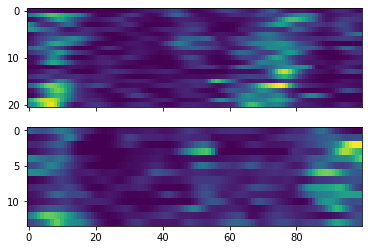

In [4]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].imshow(fr_map_[0][unit_ind_in_pyr].T,aspect='auto')
ax[1].imshow(fr_map_[1][unit_ind_in_pyr].T,aspect='auto')
# ax[1].set_xticklabels()

In [249]:
regressors_one_trial = {}
tt=0
mask = regressors['trial_type']==tt
regressors_one_trial['position'] = regressors['position'][mask]
regressors_one_trial['trial_inds_int'] = regressors['trial_inds_int'][mask]
regressors_one_trial['trial_type_inds'] = {tt:regressors['trial_type_inds'][tt]}
regressors_one_trial['trial_type'] = regressors['trial_type'][mask]
regressors_one_trial['dt'] = regressors['dt']
target_spk_one_trial = target_spk[mask]


In [237]:
unit_str

'unit_31'

In [251]:
target_spk_allneurons = np.array(fr_[['unit_31','unit_32']].values)[mask]

In [255]:
reload(glmc)
res=glmc.cv_all_neurons(target_spk_allneurons,regressors_,reg_pars_tosweep_kwargs_={'nfields':[1,2]},reg_pars_=reg_pars,fit_kwargs_={'niters':40},cv_kwargs_={'cv_fold':2,'mask_ratio':0.2},dosave=False,save_kwargs_={},forcereload=False,nfields_max=5,key_int=0)


In [262]:
res[0]['delta_ws'].shape

(2, 2, 2, 21, 5)

In [149]:
reload(gm)

<module 'gm' from '/mnt/home/szheng/projects/util_code/gm.py'>

In [153]:
pars_trans_init

{'delta_ws': DeviceArray([[ -6.855831  ,  -8.504949  ,  16.265484  ],
              [  1.3953876 ,  -2.6400852 ,  12.619823  ],
              [ 19.290077  ,  -8.962383  , -12.704349  ],
              [-14.929051  ,   3.6357918 ,   4.4812202 ],
              [-15.484643  , -10.533533  ,  16.184364  ],
              [ 15.811623  ,   7.1051826 , -18.810326  ],
              [ -2.930359  ,  16.54921   ,   4.581417  ],
              [-12.961283  ,  13.273346  ,  11.266304  ],
              [  5.266815  ,  -4.7282314 , -12.774425  ],
              [ -9.424925  ,  19.572224  ,  11.541389  ],
              [ -8.635726  , -18.663187  ,   6.270914  ],
              [ 19.505203  ,  -6.845646  ,   0.22893906],
              [-10.718341  ,  19.165134  ,   5.52001   ],
              [ -5.9725237 ,  -0.22851562, -19.953842  ],
              [ -5.2955294 ,   9.517736  ,  13.091816  ],
              [ -4.561944  ,  -4.6572065 ,  -7.963972  ],
              [-14.588671  , -11.923738  ,  -6.781745  ],
  

{'delta_b': DeviceArray([[ 0.14974055],
             [ 0.50458777],
             [ 1.1844089 ],
             [-0.38193378],
             [-1.6335142 ],
             [-0.7607841 ],
             [-1.9162385 ],
             [-1.2583103 ],
             [-0.7897551 ],
             [-0.5298872 ],
             [-0.31763053],
             [-0.2743113 ],
             [-0.41038898],
             [ 0.6375473 ],
             [ 0.5520844 ],
             [ 0.1293928 ],
             [-0.9286746 ],
             [-2.015446  ],
             [-1.6198297 ],
             [-0.6110791 ],
             [-0.9536695 ]], dtype=float32), 'delta_ws': DeviceArray([[ -8.333146  ,  -9.98133   ,  16.265484  ],
             [  1.3953876 ,  -2.6400852 ,  12.619823  ],
             [ 17.819572  , -10.443682  , -12.704349  ],
             [-14.929051  ,   3.6357918 ,   4.4812202 ],
             [-16.960695  , -12.00416   ,  16.184364  ],
             [ 15.811623  ,   7.1051826 , -18.810326  ],
             [ -4.3981814 ,  

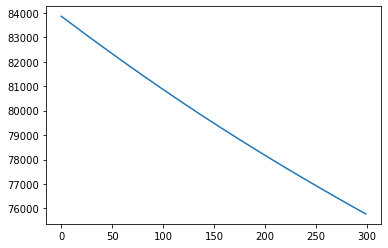

In [152]:
%%time
K = 4
key = jax.random.PRNGKey(0)

niters=300
lr=5e-3
reg_pars = gm.get_reg_pars({'g_w':1000.,'g_b':10000.,'g_sigma_thresh':100000.,'sigma_thresh':3,'g_sigma_shrinkage':0.})
regressors_ = regressors_one_trial#regressors
# pars_sim_init = gm.init_all_trials(ntrials=ntrials,random_init=True,sigma_default=1.,K=K)
# pars_trans_init=glm.random_init_jax(key,regressors_,nfields=K,uncentered=True)

# ys_l=fr_map_[0][unit_ind_in_pyr]
# pars_glm_init=glm_init_using_gm_init(ys_l,ys_l.shape[0],regressors_one_trial,bin_to_lin=bin_to_lin,nfields=K)
# pars_trans_init =  pars_glm_init

target_spk_ = target_spk_one_trial
# target_spk_ = scipy.ndimage.gaussian_filter1d(target_spk_.astype(float),sigma=3)

# pars_fit_gd_trans,loss_l=gm.train_adam(glm.negative_logpdf,regressors_,pars_trans_init,target_spk_,reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian',loss_type='poisson',niters=niters,lr=lr)

pars_fit_gd_trans,loss_l=gm.train_adam(glm.negative_logpdf,regressors_,pars_trans_init,target_spk_,reg_pars,nfields_mask,reg_type='gaussian_logprior_laplacian',loss_type='poisson',niters=niters,lr=lr)
# pars_fit_gd_trans,loss_l=gm.train_adam(glm.negative_logpdf,regressors_,pars_trans_init,target_spk_,reg_pars=reg_pars,reg_type=None,loss_type='gaussian',niters=niters,lr=lr)
pars_fit_gd = glm.pars_invtransform(pars_fit_gd_trans,regressors_)
plt.plot(loss_l)
print(pars_fit_gd_trans)

In [178]:
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [181]:
def get_nfields_mask_dict(nfields_max):
    nfields_mask_dict={}
    for i in range(nfields_max):
        nfields_mask_dict[i]=np.zeros(nfields_max).at[:i].set(1)
    return nfields_mask_dict
get_nfields_mask_dict(4)

{0: DeviceArray([0., 0., 0., 0.], dtype=float32),
 1: DeviceArray([1., 0., 0., 0.], dtype=float32),
 2: DeviceArray([1., 1., 0., 0.], dtype=float32),
 3: DeviceArray([1., 1., 1., 0.], dtype=float32)}

In [194]:
import glm_cv as glmc
reload(glmc)
mask_l = np.array([[1,0,0,0,0],[1,1,0,0,0]])
vmap(glmc.train_and_test,in_axes=(None,None,None,0,None,None,None,None,None,None))(key,target_spk_,regressors_,mask_l,reg_pars,'gaussian_logprior_laplacian',None,'poisson',400,0.05)


({'delta_b': DeviceArray([[[ 0.8031751 ],
                [ 1.4237473 ],
                [ 2.034544  ],
                [ 1.5660808 ],
                [ 1.0939112 ],
                [ 0.5555995 ],
                [ 0.01940116],
                [ 0.15344903],
                [ 0.28901434],
                [ 0.4259475 ],
                [ 0.5629736 ],
                [ 0.6997334 ],
                [ 0.57163614],
                [ 2.532769  ],
                [ 1.279476  ],
                [ 0.02593846],
                [-0.16665861],
                [-0.3587061 ],
                [-1.9060415 ],
                [-1.6919832 ],
                [-1.4434782 ]],
  
               [[ 0.7972368 ],
                [ 1.41168   ],
                [ 2.0159972 ],
                [ 1.5591629 ],
                [ 1.0995111 ],
                [ 0.48507828],
                [-0.10424738],
                [ 0.04742728],
                [ 0.20654023],
                [ 0.3746472 ],
                [ 0.5439

In [7]:
reload(glmh)

<module 'gm_glm_bayesian_helper' from '/mnt/home/szheng/projects/util_code/gm_glm_bayesian_helper.py'>

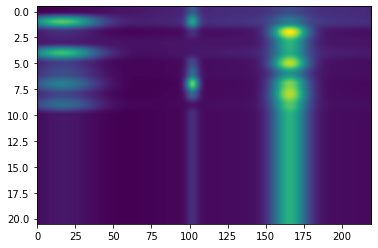

In [73]:
par_trans_one_dict = glmh.split_par_trial_type(pars_fit_gd_trans,regressors_)
fr_map_hat = glmh.get_prediction_one(par_trans_one_dict[0],regressors,nbins=220)
plt.imshow(fr_map_hat.T,aspect='auto',interpolation=None)

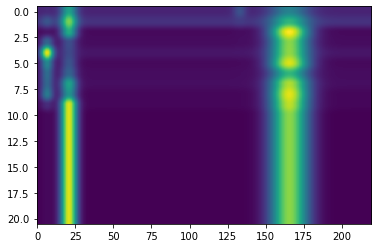

In [8]:
par_trans_one_dict = glmh.split_par_trial_type(pars_fit_gd_trans,regressors_)
fr_map_hat = glmh.get_prediction_one(par_trans_one_dict[0],regressors,nbins=220)
plt.imshow(fr_map_hat.T,aspect='auto',interpolation=None)

In [49]:
def glm_init_using_gm_init(ys_l,ntrials,regressors_,sigma_default=1.,nfields=2,bin_to_lin=None):
    '''
    an awkward interface for using the old gm.init_al_trials function to deterministically initialize params
    '''
    key = jax.random.PRNGKey(0) #not important here
    pars_gm_init = gm.init_all_trials(ys_l,ntrials=21,random_init=False,sigma_default=sigma_default,K=nfields)
    pars_glm_init = glm.random_init_jax(key,regressors_,nfields=nfields,uncentered=True)
    if bin_to_lin is not None: # convert from 100 bin unit to 0-221 cm unit
        mus = bin_to_lin[numpy.array(pars_gm_init['mus'].mean(axis=0).astype(int))][None,:] # mus are averaged, when we use fixed mu across trials
    pars_glm_init['mus']=mus
    
    
    ws=mf.softplus(pars_gm_init['logws'])
    ws_bar = ws.mean(axis=0,keepdims=True)
    logws_bar = mf.inv_softplus(ws_bar)
    pars_glm_init['logws_bar'] = logws_bar
    delta_ws = mf.inv_softplus(ws)-logws_bar
    pars_glm_init['delta_ws'] = delta_ws
    return pars_glm_init
    

In [74]:
glm.negative_logpdf(regressors_,pars_fit_gd_trans,target_spk_,mask=None,loss_type="poisson",reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian')


DeviceArray(10533.106, dtype=float32)

In [82]:
pars_fit_gd

{'mus': DeviceArray([[ 15.7269125, 101.60426  , 165.47581  , 165.51048  ]], dtype=float32),
 'sigmas': DeviceArray([[ 17.014212 ,   3.0152524,   8.394979 , 102.15438  ]], dtype=float32),
 'ws_bar': DeviceArray([[0.03601048, 8.792519  , 1.2974411 , 5.294914  ]], dtype=float32),
 'ws': DeviceArray([[ 0.01835346,  2.897023  ,  1.5615535 ,  3.195613  ],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [11.877589  ,  7.738746  ,  4.175773  ,  3.520103  ],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [ 2.4421968 ,  1.7656423 , 15.871447  ,  1.7510473 ],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [ 0.5973408 ,  0.06337404,  9.910532  ,  0.30117366],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [ 0.        ,  0.        ,  0.        ,  0.        ],
              [ 0.        ,  0.     

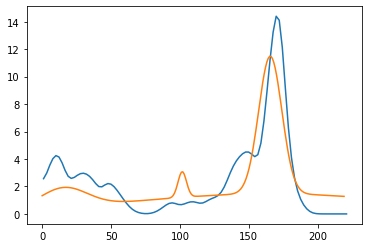

In [92]:
t=14
plt.plot(bin_to_lin,fr_map_[0][unit_ind_in_pyr][:,t])
plt.plot(fr_map_hat[:,t])

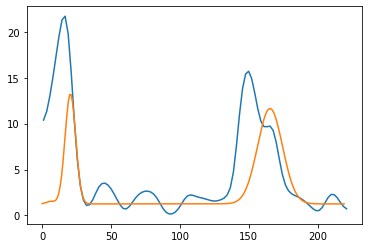

In [50]:
t=20
plt.plot(bin_to_lin,fr_map_[0][unit_ind_in_pyr][:,t])
plt.plot(fr_map_hat[:,t])

In [218]:
pars_fit_gd_trans_copy=copy.copy(pars_fit_gd_trans)
pars_fit_gd_trans_copy['logws_bar']=pars_fit_gd_trans_copy['logws_bar'].at[0,1].set(0.01)

glm.negative_logpdf(regressors_,pars_fit_gd_trans_copy,target_spk_,mask=None,loss_type="poisson",reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian')


DeviceArray(513.6737, dtype=float32)

In [219]:
jax.grad(glm.negative_logpdf,argnums=1)(regressors_,pars_fit_gd_trans_copy,target_spk_,mask=None,loss_type="poisson",reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian')




{'delta_b': DeviceArray([[-0.19834381]], dtype=float32),
 'delta_ws': DeviceArray([[ -3.6588998, -10.044015 ,  -5.8198013,  -0.886149 ]], dtype=float32),
 'logb_bar': DeviceArray([[-0.1937577]], dtype=float32),
 'logsigmas': DeviceArray([[ 3.4648098e-02,  1.4506649e-23,  3.9562866e-01,
               -2.1824744e-02]], dtype=float32),
 'logws_bar': DeviceArray([[ 8.5170344e-03,  5.4969311e-23,  9.4928451e-02,
               -1.6385188e-02]], dtype=float32),
 'mus': DeviceArray([[-3.9874916e-03,  4.1199341e-25, -5.2863844e-02,
                6.4155543e-03]], dtype=float32)}

In [220]:
pars_fit_gd_trans

{'delta_b': DeviceArray([[-0.2293054]], dtype=float32),
 'delta_ws': DeviceArray([[-18.337084, -50.220074, -29.573648,  -4.348819]], dtype=float32),
 'logb_bar': DeviceArray([[1.2952222]], dtype=float32),
 'logsigmas': DeviceArray([[ 3.0536835,  2.9371297,  3.0429776, 51.0837   ]], dtype=float32),
 'logws_bar': DeviceArray([[20.800438, 41.830654, 33.99108 , 10.180365]], dtype=float32),
 'mus': DeviceArray([[  9.566793,  55.732056, 131.69145 , 263.7042  ]], dtype=float32)}

<AxesSubplot:xlabel='position'>

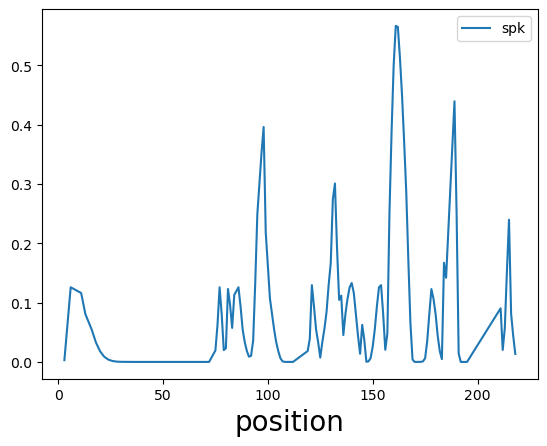

In [221]:
target_df=pd.DataFrame(np.array([target_spk_,regressors_['position']]).T,columns=['spk','position'])
target_df['position']=target_df['position'].astype(int)
target_df.groupby('position').mean().plot()

In [222]:
spk_hat=glm.forward(regressors_,pars_fit_gd_trans)
spk_hat_correct=glm.forward(regressors_,pars_fit_gd_trans_copy)

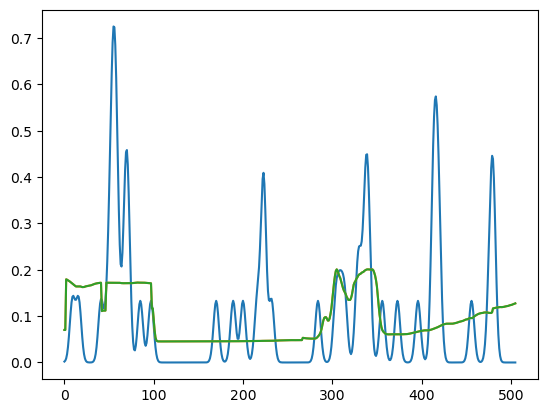

In [223]:
plt.plot(target_spk_)
plt.plot(spk_hat)
plt.plot(spk_hat_correct)

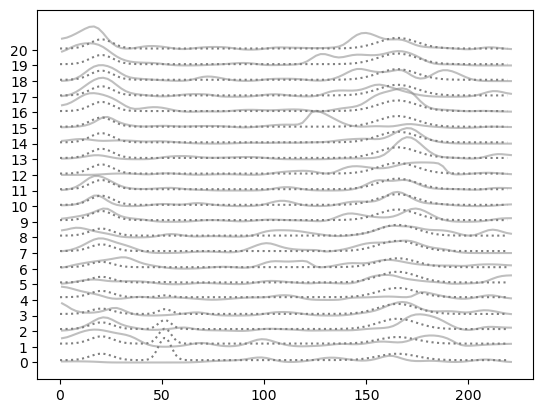

In [104]:
import gm_plot as gp
fig,ax=plt.subplots()
displacement=None
fig,ax,displacement=gp.plot_fr_trial(fr_map_[0][unit_ind_in_pyr],bin_to_lin=bin_to_lin,color='grey',linestyle='-',alpha=0.5,fig=fig,ax=ax,displacement=displacement)
fig,ax,displacement=gp.plot_fr_trial(fr_map_hat,bin_to_lin=None,color='grey',linestyle=':',fig=fig,ax=ax,displacement=displacement)

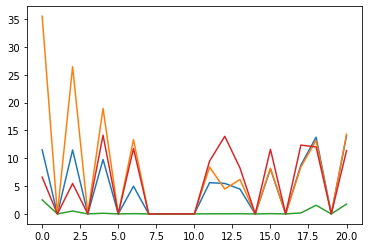

In [63]:
plt.plot(pars_fit_gd['ws'])

In [6]:
import gm_cv as gc

In [7]:
ma = gc.get_train_test_mask(222,35,ratio_consec_bins_to_mask=0.2)

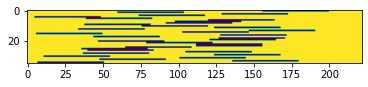

In [8]:
plt.imshow(ma.T,interpolation=None)

In [9]:
regressors['trial_inds_int']

array([ 0,  0,  0, ..., 34, 34, 34])

In [14]:
ma[regressors['position'].astype(int),regressors['trial_inds_int'].astype(int)]

array([1., 1., 1., ..., 1., 1., 1.])

In [102]:
import glm_cv as glmc
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [105]:
reg_pars

{'S_l1': 100000000.0,
 'g_mu': 200.0,
 'g_sigma': 1000.0,
 'g_w': 1000.0,
 'g_b': 10000.0,
 'sigma_thresh': 3,
 'g_sigma_thresh': 100000.0,
 'nfields': 2,
 'g_order': 1000.0,
 'g_sigma_shrinkage': 0.0}

In [134]:
del glmc

In [141]:
np.argsort(regressors_['trial_inds_int'],)

DeviceArray([    0,     1,     2, ..., 35099, 35100, 35101], dtype=int32)

In [144]:
import glm_cv as glmc
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [145]:
mask = glmc.get_train_test_mask_from_space(regressors_,ratio_consec_bins_to_mask=0.2)
pars_learned_trans, loss_l, test_loss = glmc.train_and_test(target_spk_,regressors_,reg_type='gaussian_logprior_laplacian',reg_pars_=reg_pars,nfields=2,mask=mask,loss_type='poisson',niters=4000,lr=0.05,key_int=0)


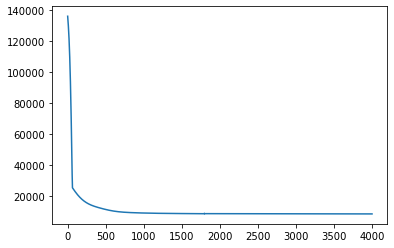

In [149]:
plt.plot(loss_l)

In [150]:
test_loss

DeviceArray(2668.1914, dtype=float32)

In [154]:
reload(glmc)
import gm_cv as gc

In [162]:
reg_pars_l

[{'S_l1': 100000000.0,
  'g_mu': 200.0,
  'g_sigma': 1000.0,
  'g_w': 1.0,
  'g_b': 10000.0,
  'sigma_thresh': 3,
  'g_sigma_thresh': 100000.0,
  'nfields': 2,
  'g_order': 1000.0,
  'g_sigma_shrinkage': 0.0},
 {'S_l1': 100000000.0,
  'g_mu': 200.0,
  'g_sigma': 1000.0,
  'g_w': 10.0,
  'g_b': 10000.0,
  'sigma_thresh': 3,
  'g_sigma_thresh': 100000.0,
  'nfields': 2,
  'g_order': 1000.0,
  'g_sigma_shrinkage': 0.0}]

In [169]:
reg_pars_d

{'S_l1': DeviceArray([1.e+08, 1.e+08], dtype=float32),
 'g_mu': DeviceArray([200., 200.], dtype=float32),
 'g_sigma': DeviceArray([1000., 1000.], dtype=float32),
 'g_w': DeviceArray([ 1., 10.], dtype=float32),
 'g_b': DeviceArray([10000., 10000.], dtype=float32),
 'sigma_thresh': DeviceArray([3, 3], dtype=int32),
 'g_sigma_thresh': DeviceArray([100000., 100000.], dtype=float32),
 'nfields': DeviceArray([2, 2], dtype=int32),
 'g_order': DeviceArray([1000., 1000.], dtype=float32),
 'g_sigma_shrinkage': DeviceArray([0., 0.], dtype=float32)}

In [196]:
import gm_cv as gc

In [202]:
reg_pars_ = gm.get_reg_pars(reg_pars) # add in the default
reg_pars_tosweep_kwargs = {'g_w':[1.,10.]}
reg_pars_l = gc.expand_cv_param_grid(reg_pars_,**reg_pars_tosweep_kwargs)
reg_pars_name = list(reg_pars_l[0].keys())
reg_pars_d = {}
for k in reg_pars_name:
    reg_pars_d[k] = np.array([rp_[k] for rp_ in reg_pars_l])
nfields_max = 5
reg_pars_d['nfields_mask']=np.array([np.zeros(nfields_max).at[:i].set(1).astype(bool) for i in reg_pars_d['nfields']])

In [200]:
reg_pars_d

{'S_l1': DeviceArray([1.e+08, 1.e+08], dtype=float32),
 'g_mu': DeviceArray([200., 200.], dtype=float32),
 'g_sigma': DeviceArray([1000., 1000.], dtype=float32),
 'g_w': DeviceArray([ 1., 10.], dtype=float32),
 'g_b': DeviceArray([10000., 10000.], dtype=float32),
 'sigma_thresh': DeviceArray([3, 3], dtype=int32),
 'g_sigma_thresh': DeviceArray([100000., 100000.], dtype=float32),
 'nfields': DeviceArray([2, 2], dtype=int32),
 'g_order': DeviceArray([1000., 1000.], dtype=float32),
 'g_sigma_shrinkage': DeviceArray([0., 0.], dtype=float32),
 'nfields_mask': [DeviceArray([1., 1., 0., 0., 0.], dtype=float32),
  DeviceArray([1., 1., 0., 0., 0.], dtype=float32)]}

In [221]:
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [ ]:
1

In [222]:
fn_full, cv_kwargs, fit_kwargs, reg_pars_l, reg_pars_name, mask_l=glmc.cv_prep(regressors,reg_pars_tosweep_kwargs_={},reg_pars_={},fit_kwargs_={},cv_kwargs_={'cv_fold':2},save_kwargs_={},nfields_max=5)
target=target_spk_
regressors=regressors_
glmc.cv_one_neuron_given_mask_l(key,target,regressors,cv_kwargs, fit_kwargs, reg_pars_l, reg_pars_name, mask_l, fn_full=fn_full)


KeyboardInterrupt: 

In [227]:
cv_one_neuron_one_mask_wrapper = lambda key,mask: glmc.cv_one_neuron_one_mask(key,mask,target_spk_,regressors_,reg_pars_l,fit_kwargs=dict(reg_type = 'gaussian_logprior_laplacian',lr=0.05,loss_type='poisson',niters=40))
# res = vmap(jit(cv_one_neuron_one_mask_wrapper))(key_l,mask_l)

In [228]:
jit(cv_one_neuron_one_mask_wrapper)(key,mask_l[0])

2022-08-10 17:40:46.543845: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:62] 
********************************
[Compiling module jit__lambda_.391] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2022-08-10 17:41:12.331273: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:131] The operation took 2m25.787512962s

********************************
[Compiling module jit__lambda_.391] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


KeyboardInterrupt: 

In [236]:
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [ ]:
target_all_neurons = 

In [235]:
glmc.cv_one_neuron_one_mask(key,mask_l[0],target_spk_,regressors_,reg_pars_d,fit_kwargs=dict(reg_type = 'gaussian_logprior_laplacian',lr=0.05,loss_type='poisson',niters=40))
# glmc.cv_one_neuron_one_mask(key,target_spk_,regressors_,reg_pars_d,dict(reg_type = 'gaussian_logprior_laplacian',lr=0.05,loss_type='poisson',niters=40))




({'delta_b': DeviceArray([[[-1.2149148 ],
                [-0.25145733],
                [ 0.18264441],
                [-0.3526043 ],
                [-0.74256766],
                [-1.5070133 ],
                [-2.661175  ],
                [-1.1462623 ],
                [-0.6220001 ],
                [-0.5948397 ],
                [-0.84397507],
                [-2.597943  ],
                [ 0.09535208],
                [-0.14500631],
                [-1.6172789 ],
                [-2.8147907 ],
                [-0.22182325],
                [-0.84049284],
                [-0.18076865],
                [-0.39321226],
                [-1.4082898 ]],
  
               [[ 3.0196505 ],
                [ 0.797473  ],
                [-0.03296094],
                [-0.37613785],
                [ 0.06636231],
                [ 0.7712868 ],
                [ 2.2146716 ],
                [ 1.0987653 ],
                [ 0.676245  ],
                [-0.04431183],
                [ 0.0123

In [208]:
del(glmc)

In [205]:
import glm_cv as glmc
reload(glmc)

<module 'glm_cv' from '/mnt/home/szheng/projects/util_code/glm_cv.py'>

In [199]:
reload(glm)

<module 'gm_glm_bayesian' from '/mnt/home/szheng/projects/util_code/gm_glm_bayesian.py'>

# the problem!!!:
during initialization, nfields should not be giving through vmap, but should be a static integer
can revert back about all the ntrials, ntrial_type in the argument, maybe?

In [77]:
np.array([1,1,1],dtype=bool).sum()

DeviceArray(3, dtype=int32)

In [129]:
reload(mf)

<module 'math_functions' from '/mnt/home/szheng/projects/util_code/math_functions.py'>

In [86]:
pars_init=glm.pars_invtransform(pars_trans_init,regressors)

In [89]:
mask =np.array([1,1,0],dtype=bool)

In [102]:
pars_init['mus']

DeviceArray([[ 13.103398,  79.77007 , 146.43674 ],
             [  9.342671,  76.009346, 142.67601 ]], dtype=float32)

In [105]:
mus = np.array([[1,2,3],[3,1,2]])

In [109]:
np.dot(jax.nn.relu(-np.diff(mus,axis=1,prepend=0.)),mask)

DeviceArray([0., 2.], dtype=float32, weak_type=True)

In [124]:
pars_init['sigmas']

DeviceArray([[46.63002   , 34.26679   , 29.775726  ],
             [43.602585  , 33.31129   ,  0.78176856]], dtype=float32)

In [123]:
# mf.sigma_toosmall_penalty(0.1,100,pars_init['sigmas'],mask)
# mf.order_prior(0.1,np.array([[1,2,3],[0,1,2]]),mask)
mf.sigma_shrinkage_prior(0.1,pars_init['sigmas'],np.array([1,1,1]))

DeviceArray(-120.77673, dtype=float32)

In [128]:
np.mean(np.diff(pars_trans_init['delta_ws'],axis=0))

DeviceArray(0.47379172, dtype=float32)

In [133]:
xx=pars_trans_init['delta_ws'].at[:].set(0)

In [134]:
mf.gaussian_logprior_laplacian(xx,0,mask)

DeviceArray(-0., dtype=float32)

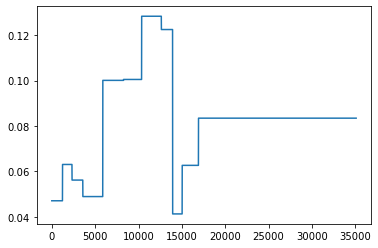

In [74]:
plt.plot(jit(forward)(regressors_,pars_trans_init,np.array([0,0,0],dtype=bool)))

In [138]:
nfields_mask = mask

In [146]:
reload(glm)

<module 'gm_glm_bayesian' from '/mnt/home/szheng/projects/util_code/gm_glm_bayesian.py'>

In [147]:
glm.negative_logpdf(regressors_,pars_trans_init,target_spk_one_trial,nfields_mask,mask=None,loss_type="poisson",reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian')


DeviceArray(83860.66, dtype=float32)

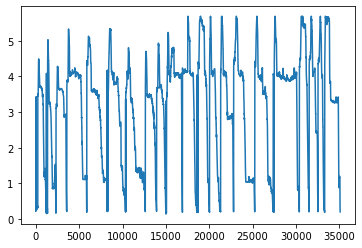

In [69]:
plt.plot(glm.forward(regressors_,pars_trans_init))

In [47]:
from math_functions import inv_softplus
def random_init_jax(rngkey,regressors,ntrials,nfields_mask,nfields_max=5,ntrial_types=2,init_max_w = 100., init_max_sigma = 50.,init_max_b = 5.,init_max_mu = 200.,init_max_deltaw=20.,init_max_deltab=2.,dobar=True, uncentered=True):
    '''
    replacing the old gm.init_all_trials, to use rng keys in jax, easier for vmap and multichain
    dobar: initialize with the param_bar that is useful for the gaussian prior
    '''
    # ntrial_types = len(regressors['trial_type_inds'].keys())
    # ntrials = len(numpy.unique(regressors['trial_inds_int']))
    
    
    def init_mus(key,ntrial_types):
#         mu_segments = np.linspace(0,init_max_mu,nfields+1)
        mu_segments = np.linspace(0,init_max_mu,nfields_max+1)
        mus = []
#         for k in range(nfields):  
        for k in range(nfields_max):  
            uni = jax.random.uniform(key,(ntrial_types,))*(mu_segments[k+1]-mu_segments[k] )+mu_segments[k]  #same uniform random var but in different segments to ensure seperate init
            mus.append(uni)   
        
        # return np.sort(np.array(mus))[None,:]
        return np.sort(np.array(mus).T)
    if uncentered:
        pars_trans = {}
        keys = jax.random.split(rngkey,num=6)
        pars_trans['delta_ws']= jax.random.uniform(keys[0],(ntrials,nfields_max)) * 2*init_max_deltaw - init_max_deltaw
        pars_trans['delta_b']= jax.random.uniform(keys[1],(ntrials,1)) * init_max_deltab * 2 - init_max_deltab

        pars_trans['logws_bar']=inv_softplus(jax.random.uniform(keys[2],(ntrial_types,nfields_max)) * init_max_w) 
        pars_trans['logb_bar']=inv_softplus(jax.random.uniform(keys[3],(1,1)) * init_max_b) 
        pars_trans['logsigmas']=inv_softplus(jax.random.uniform(keys[4],(ntrial_types,nfields_max)) * init_max_sigma)  
        pars_trans['mus'] = init_mus(keys[5],ntrial_types)
        
        pars_trans['mus'] = pars_trans['mus'][:,nfields_mask]
        
        return pars_trans

    else:
        pars={}
        keys = jax.random.split(rngkey,num=4)
        pars['logws']=inv_softplus(jax.random.uniform(keys[0],(ntrials,nfields_max)) * init_max_w) 

        pars['logsigmas']=inv_softplus(jax.random.uniform(keys[1],(1,nfields_max)) * init_max_sigma)  
        pars['logb'] = inv_softplus(jax.random.uniform(keys[2],(ntrials,1)) * init_max_b)

        
        pars['mus']=init_mus(keys[3])

        if dobar:
            pars=get_parbar(pars,regressors)
        return pars

In [58]:
rngkey = jax.random.PRNGKey(0)
k_l = jax.random.split(rngkey,3)
ntrials = 35
nfields=3
pars_trans=vmap(random_init_jax,in_axes=(0,None,None,0))(k_l,regressors,ntrials,np.array([[1,1,1,0,0],[1,1,0,0,0],[1,0,0,0,0]],dtype=bool))




NonConcreteBooleanIndexError: Array boolean indices must be concrete; got ShapedArray(bool[5])

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.NonConcreteBooleanIndexError

In [144]:
key_l = jax.random.split(key,3)
vmap(jit(glm.random_init_jax),in_axes=(0,None,None,0,None))(key_l,regressors_,ntrials,np.array([2,3,3]),ntrial_types)

NameError: name 'key' is not defined

21

In [214]:
%%time
ntrials = len(numpy.unique(regressors_['trial_inds_int']))
ntrial_types=len(numpy.unique(regressors_['trial_type']))
pars_learned_l,train_loss_l,test_loss_l=glmc.cv_one_neuron_one_mask(key,target_spk_,regressors_,ntrials,reg_pars_d,ntrial_types=ntrial_types)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/IPython/core/magics/execution.py", line 1316, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 3, in <module>
  File "/mnt/home/szheng/projects/util_code/glm_cv.py", line 65, in cv_one_neuron_one_mask
    pars_trans_init_l = vmap(glm.random_init_jax,in_axes=(0,None,None,0))(key_l,regressors,ntrials,nfields_l)
  File "/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/jax/_src/traceback_util.py", line 162, in reraise_with_filtered_traceback
    return fun(*args, **kwargs)
  File "/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/jax/_src/api.py", line 1557, in vmap_f
    out_flat = batching.batch(
  File "/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/jax/linear_util.py", line 168, in call_wrapped
    ans = self.f(*args, **dict(self.params, **kwargs))
  File "/mnt/home/szheng/projects/util_code/gm_glm_bayesian.py", line 317, in random_init_

In [218]:
reg_pars_l = reg_pars_d

In [219]:
mask = glmc.get_train_test_mask_from_space(regressors,ratio_consec_bins_to_mask=0.2)
# nfields_l = np.array([rp_['nfields'] for rp_ in reg_pars_l] )
nfields_l=reg_pars_l['nfields']
key_l = jax.random.split(key,num=len(nfields_l))
pars_trans_init_l = vmap(glm.random_init_jax,in_axes=(0,None,None,0))(key_l,regressors,ntrials,nfields_l)
train_and_test_wrapper=lambda pti,rp_,nfields,mask: train_and_test(pti,target,regressors,ntrials,ntrial_types=ntrial_types,reg_pars_=rp_,nfields=nfields,mask=mask,**fit_kwargs)
pars_learned_l,_,test_loss_l= vmap(train_and_test_wrapper,in_axes=(0,0,0,None))(pars_trans_init_l,reg_pars_l,nfields_l,mask)
loss_noreg_wrapper=lambda par:glm.negative_logpdf_no_reg(regressors,par,target,mask=mask,loss_type=fit_kwargs['loss_type'])
train_loss_l = vmap(loss_noreg_wrapper)(pars_learned_l)

TypeError: Shapes must be 1D sequences of concrete values of integer type, got (21, Traced<ShapedArray(int32[])>with<BatchTrace(level=1/0)> with
  val = DeviceArray([2, 2], dtype=int32)
  batch_dim = 0).
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.

In [ ]:
glmc.cv_one_neuron_one_mask(target_spk_,regressors_)

In [ ]:
%%time
key = jax.random.PRNGKey(1)
K=3
Nchains=1
Nsamples = 4000
pars_trans_init=glm.random_init_jax(key,regressors,nfields=K,uncentered=True)
reg_pars = gm.get_reg_pars({'g_w':10.,'g_b':10.,'g_sigma_thresh':100000.,'sigma_thresh':3,'g_sigma_shrinkage':10.})
key = jax.random.PRNGKey(0)
key_l = jax.random.split(key,num=Nchains)
pars_trans_init_multi=jax.vmap(glm.random_init_jax,in_axes=(0,None,None))(key_l,regressors,K)

pars_sim_init_one = glm.random_init_jax(key,regressors,K)
nparams = len(jax.flatten_util.ravel_pytree(pars_sim_init_one)[0])

inv_mass_matrix = construct_inv_mass(pars_sim_init_one)
# inv_mass_matrix = np.ones(nparams)

step_size = 1e-3#2e-3
sampler_func = blackjax.hmc
sampler_kw = {'step_size':step_size,'inv_mass_matrix':inv_mass_matrix,'num_integration_steps':30}


states,infos = glm.fit_multichain(regressors,pars_trans_init_multi,target_spk, reg_pars=reg_pars,reg_type='gaussian_logprior_laplacian' ,sampler_func=sampler_func,sampler_kw=sampler_kw,num_samples=Nsamples,rng_key_int=0)
samples = states.position
try:
    logprob=states.logprob
    logprob_grad =states.logprob_grad 
except:
    logprob=-states.potential_energy
    logprob_grad =states.potential_energy_grad
